<a href="https://colab.research.google.com/github/AbdullahProgrammerX/machine-learning/blob/main/fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [1]:

from google.colab import files

# kaggle.json dosyasını yükle
files.upload()

# Kaggle API anahtarını doğru dizine taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Güvenlik için izinleri ayarla


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 80% 53.0M/66.0M [00:00<00:00, 200MB/s]
100% 66.0M/66.0M [00:00<00:00, 193MB/s]


In [5]:
import zipfile

# İndirilen zip dosyasını aç
with zipfile.ZipFile("/content/creditcardfraud.zip", "r") as zip_ref:
    zip_ref.extractall("credit_data")  # ev_data adlı klasöre çıkart


In [10]:
df = pd.read_csv("/content/credit_data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Veri setindeki değişken ve gözlem sayısı
print("Gözlem sayısı : " ,len(df))
print("Değişken sayısı : ", len(df.columns))

Gözlem sayısı :  284807
Değişken sayısı :  31


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

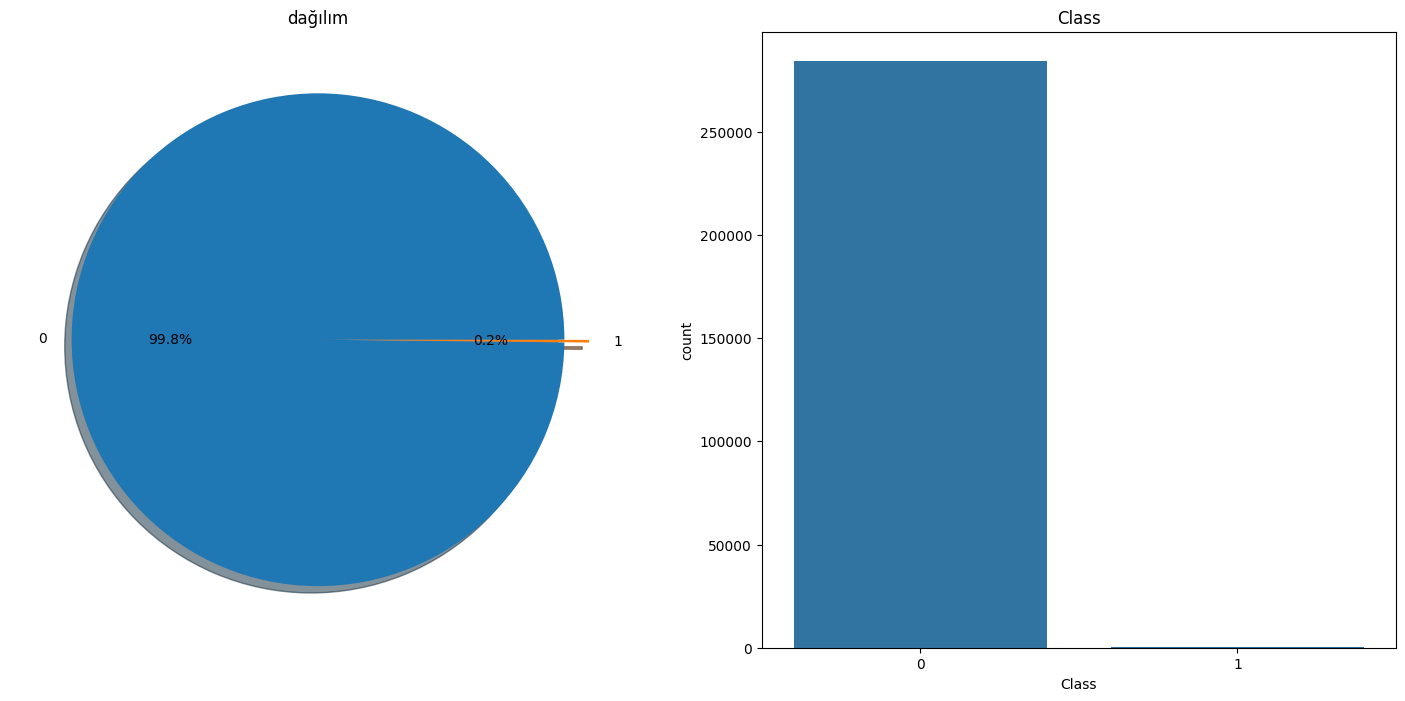

In [14]:
# 1 sınıfının veri setinde bulunma oranı %0.2, 0 sınıfının ise %99.8
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot(x='Class',data=df,ax=ax[1])
ax[1].set_title('Class')
plt.show()

In [17]:
# Time ve Amount değişkenlerini standartlaştırma
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [20]:
# Hold out yöntemi uygulayıp veri setini eğitim ve test olarak ikiye ayırıyoruz.(%80,%20)
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [24]:
# modelin tanımlanıp, eğitilmesi ve başarı skoru
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.999


In [34]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    plt.rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

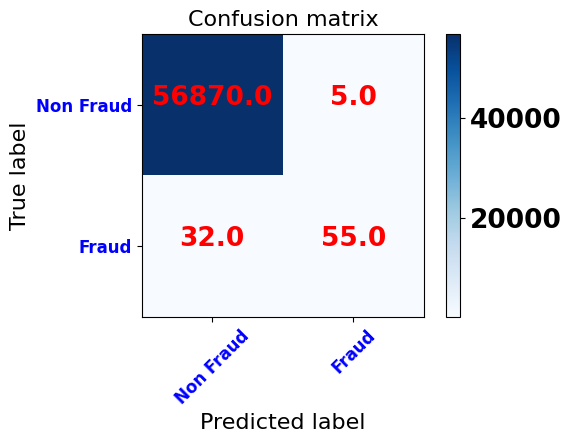

In [35]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [36]:
# Precision (Kesinlik): Pozitif olarak tahmin edilenlerin ne kadarının gerçekte pozitif olduğunu gösterir. Eğer precision düşük ise çok sayıda hatalı pozitif olduğunu ifade eder.

In [37]:
# Recall (Duyarlılık): Pozitif olarak tahmin etmemiz gereken değerlerin ne kadarını pozitif tahmin ettiğimizi gösterir. Eğer recall düşük ise çok sayıda yanlış negatif olduğunu ifade eder.

In [38]:
""" F1 score: Düşük precison ve yüksek recall veya tam tersi durumda iki modeli karşılaştırmak güçtür.
Karşılaştırılabilir bir hale getirmek F1 score'u precision ve recall'u aynı anda ölçülmesine yardımcı olur.
Precision ve Duyarlılık değerlerinin harmonik ortalamasını göstermektedir. """

" F1 score: Düşük precison ve yüksek recall veya tam tersi durumda iki modeli karşılaştırmak güçtür. Karşılaştırılabilir bir hale getirmek F1 score'u precision ve recall'u aynı anda ölçülmesine yardımcı olur. Precision ve Duyarlılık değerlerinin harmonik ortalamasını göstermektedir. "

In [39]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.92      0.63      0.75        87

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
# AUC (Area under the ROC curve)
# ROC eğrisini tek bir sayı ile özetler. (0,0) 'dan (1,1)' e kadar tüm ROC eğrisinin altındaki iki boyutlu alanın tamamını ölçer. En iyi değer 1, en kötü değeri 0.5'dir.

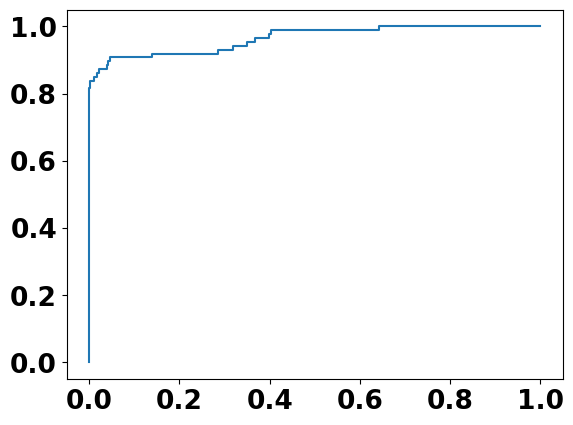

In [40]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [42]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

AUC ROC Curve with Area Under the curve = 0.964


In [ ]:
# Dengesizliği gidermek için çeşitli yöntemleri veri setine uygulayalım.

# NOT: Yöntemler eğitim setine uygulanmalıdır. Test setine uygulanırsa doğru değerlendirme yapılamaz.

In [43]:
# random oversampling önce eğitim setindeki sınıf sayısı
y_train.value_counts()

,count
Class,
0,227440
1,405


In [44]:
# RandomOver Sampling uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [45]:
# random oversampling den sonra eğitim setinin sınıf sayısı
y_randomover.value_counts()

,count
Class,
0,227440
1,227440


In [51]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%"  %accuracy)

Accuracy: 0.977%


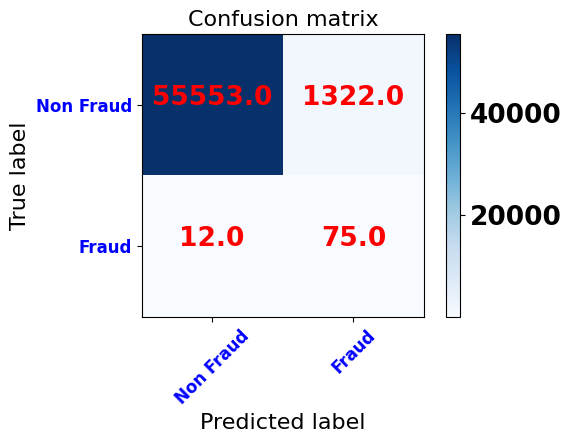

In [52]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# SMOTE Oversampling:

In [54]:
# smote dan önce eğitim setindeki sınıf sayısı
y_train.value_counts()

,count
Class,
0,227440
1,405


In [55]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [56]:
# smote dan sonra eğitim setinin sınıf sayısı
y_smote.value_counts()

,count
Class,
0,227440
1,227440


In [57]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.975%


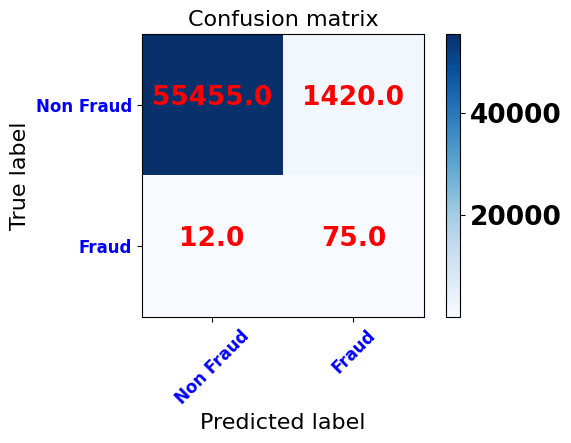

In [58]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [59]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.86      0.09        87

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.99     56962



In [60]:
# Random Undersampling:

In [61]:
# random undersampling den önce eğitim setindeki sınıf sayısı
y_train.value_counts()

,count
Class,
0,227440
1,405


In [62]:
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)

In [63]:
# Random undersampling sonra
y_ranUnSample.value_counts()

,count
Class,
0,405
1,405


In [64]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_ranUnSample, y_ranUnSample)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.952%


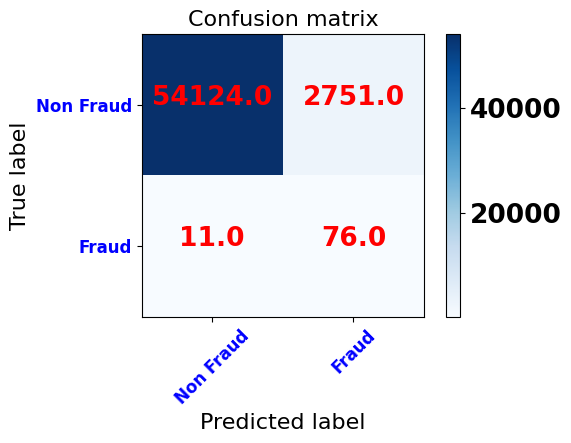

In [65]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [66]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56875
           1       0.03      0.87      0.05        87

    accuracy                           0.95     56962
   macro avg       0.51      0.91      0.51     56962
weighted avg       1.00      0.95      0.97     56962

